<a href="https://colab.research.google.com/github/Ssurf777/DL_from_scratch/blob/main/Deep_Learning_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep Learning from scratch

# 多次元配列

In [ ]:
import numpy as np
A = np.array([1,2,3,4])
print(A)

[1 2 3 4]


配列次元数の取得 np.ndim()

In [ ]:
print(f'{np.ndim(A)}次元')

1次元


In [ ]:
print(A.shape)

(4,)


In [ ]:
print(A.shape[0])

4


In [ ]:
B = np.array([ [1,2],[3,4],[5,6] ])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [ ]:
np.ndim(B)

2

In [ ]:
B.shape

(3, 2)

$$
\begin{pmatrix}1 & 2 \\3 & 4\end{pmatrix}
\begin{pmatrix}5 & 6 \\7 & 8\end{pmatrix}
=\begin{pmatrix} 19 & 22 \\ 43 & 50 \end{pmatrix}
$$

In [ ]:
A = np.array([[1, 2],[3, 4]])
B = np.array([[5, 6],[7, 8]])
C = np.dot(A, B)
print(C)

[[19 22]
 [43 50]]


$$
\begin{pmatrix}1 & 2 & 3\\4 & 5 & 6\end{pmatrix}
\begin{pmatrix}1 & 2 \\3 & 4\\5 & 6\end{pmatrix}
=\begin{pmatrix} 22 & 28 \\ 49 & 64 \end{pmatrix}
$$

In [ ]:
A = np.array([[1,2,3], [4,5,6]])
print(A.shape)

B = np.array([[1, 2], [3, 4], [5, 6]])
print(B.shape)

print("※2行3列×3行2列であると2行2列になる")

(2, 3)
(3, 2)
※2行3列×3行2列であると2行2列になる


In [ ]:
C = np.dot(A, B)
print(C)

[[22 28]
 [49 64]]


$$
\begin{pmatrix}1 & 2 \\3 & 4 \\ 5 & 6\end{pmatrix}
\begin{pmatrix}7 & 8\end{pmatrix}
=\begin{pmatrix} 23 & 53 & 83 \end{pmatrix}
$$

In [ ]:
A = np.array([[1,2],[3,4],[5,6]])
B = np.array([7,8])
C = np.dot(A, B)
print(C)

[23 53 83]


# ニューラルネットワークの実装

In [ ]:
import numpy as np

# Neural Network INPUT
X = np.array([1,2])
print(f'X.shape:{X.shape}')

# Weight
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)
print(f'W.shape:{W.shape}')

X.shape:(2,)
[[1 3 5]
 [2 4 6]]
W.shape:(2, 3)


In [ ]:
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


## 各層における信号伝達の実装

$$
A^{(1)} = \begin{pmatrix}
a^{(1)}_1 & a^{(1)}_2 & a^{(1)}_3
\end{pmatrix}
$$

$$
X=\begin{pmatrix}
x_1&x_2
\end{pmatrix}
$$

$$
B^{(1)} = \begin{pmatrix}
b^{(1)}_1 & b^{(1)}_2 & b^{(1)}_3
\end{pmatrix}
$$

$$
W^{(1)} = \begin{pmatrix}
w^{(1)}_{11} & w^{(1)}_{12} & w^{(1)}_{13} \\
w^{(1)}_{21} & w^{(1)}_{22} & w^{(1)}_{23}
\end{pmatrix}
$$



$$
w^{(1)}_{12}
$$
重みの()内は1層目の重みを指し
下付き12は前層2番目のニューロンから次層1番目のニューロンを結ぶエッジの重み

In [ ]:
  import numpy as np

  # INPUT 1x2
  X = np.array([1.0, 0.5])

  # Weight of hidden layer1 2x3
  W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])

  # baias 1x3
  B1 = np.array([0.1, 0.2, 0.3])

  print(W1.shape)
  print(X.shape)
  print(B1.shape)

# OUTPUT 1x3
  A1 =  np.dot(X, W1) + B1
  print(A1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]


$$
sigmoid(x)=\frac{1}{(1 +\exp{(-x)})}
$$

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
# Activation Sigmoid
Z1 = sigmoid(A1)
print(f'A:{A1}')
print(f'Z:{Z1}')

A:[0.3 0.7 1.1]
Z:[0.57444252 0.66818777 0.75026011]


In [ ]:
# Weight of hidden layer2 (3x2)
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])

# bias2
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)


(3,)
(3, 2)
(2,)


In [ ]:
#  2層目の出力
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

### 恒等関数の定義

In [ ]:
# 最終層の恒等関数
# 最終層は回帰の場合->恒等関数, 2値分類の場合->シグモイド, 多クラス分類の場合->softmax
def identity_function(x):
    return x

In [ ]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

In [ ]:
print(Y)

[0.31682708 0.69627909]


In [ ]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4],[0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3],[0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


### Softmax関数の定義

In [ ]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

### Softmax関数の実装上の注意

In [ ]:
a = np.array([1010, 1000, 990])
print(np.exp(a) / np.sum(np.exp(a)))
# expは容易に大きい値となるため、nanとなりやすい

[nan nan nan]


<ipython-input-22-71b6d1da37bf>:2: RuntimeWarning: overflow encountered in exp
  print(np.exp(a) / np.sum(np.exp(a)))
<ipython-input-22-71b6d1da37bf>:2: RuntimeWarning: invalid value encountered in divide
  print(np.exp(a) / np.sum(np.exp(a)))


### Softmaxのオーバーフロー対策

$$
y_k = \frac{\exp(a_k)}{\sum \exp(a_i)}
=\frac{C\exp(a_k)}{C\Sigma\exp(a_i)}
=\frac{\exp(a_k + \log{C})} {\Sigma \exp{(a_i + \log{C})}}
$$

In [ ]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # prevent overflow
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [ ]:
softmax(a = np.array([1010, 1000, 990]))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

# MNISTデータセット

In [ ]:
!pip install mnist

In [ ]:
import sys, os
import numpy as np
sys.path.append(os.pardir)
from keras.datasets import mnist

# MNISTデータセットをロード
(X_train, t_train), (X_test, t_test) = mnist.load_data()

# データをフラット化する
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# データを正規化しない（そのまま使用）
print(f"X_train shape: {X_train.shape}, t_train shape: {t_train.shape}")
print(f"X_test shape: {X_test.shape}, t_test shape: {t_test.shape}")


X_train shape: (60000, 784), t_train shape: (60000,)
X_test shape: (10000, 784), t_test shape: (10000,)


In [ ]:
# Normalize
X_train = X_train / 255
X_test = X_test / 255


In [ ]:
# label表示
t_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

もしlabelをone-hotで表記したい場合は下記参照
~~~python
# テストデータのラベルをone-hotエンコードする
from keras.utils import to_categorical

t_test = to_categorical(t_test)
t_train = to_categorical(t_train)
~~~

## MNIST画像を表示

5
(784,)
(28, 28)


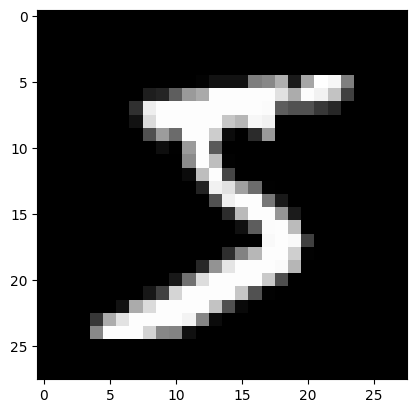

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from keras.datasets import mnist
from PIL import Image
import matplotlib.pyplot as plt

# 画像を表示する関数
def img_show(img):
    plt.imshow(img, cmap='gray')
    plt.show()

# MNISTデータセットをロード
(X_train, t_train), (X_test, t_test) = mnist.load_data()

# データをフラット化する
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

img = X_train[0]
label = t_train[0]
print(label) #5

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

## ニューラルネットワークの推論処理

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from keras.datasets import mnist
from PIL import Image
import matplotlib.pyplot as plt

def get_data():
    (X_train, t_train), (X_test, t_test) = mnist.load_data()
    # データをフラット化する
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)
    # Normalization
    X_train = X_train / 255
    X_test = X_test / 255
    return X_test, t_test

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def init_network():
#    with open("sample_weight.pkl", "rb") as f:
#      network = pickle.load(f)
    # GitHubのURL
    url = "https://github.com/Ssurf777/DL_from_scratch/blob/main/sample_weight.pkl?raw=true"

    # URLからデータを取得
    response = requests.get(url)
    response.raise_for_status()  # リクエストが成功したか確認
    # バイナリデータとしてロード
    network = pickle.loads(response.content)

    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = sigmoid(a3)

    return y

### GithubよりWeightのロード


In [ ]:
import requests
import pickle

# GitHubのURL
url = "https://github.com/Ssurf777/DL_from_scratch/blob/main/sample_weight.pkl?raw=true"

# URLからデータを取得
response = requests.get(url)
response.raise_for_status()  # リクエストが成功したか確認

# バイナリデータとしてロード
weights = pickle.loads(response.content)

# 重みを確認
print(weights)


{'b2': array([-0.01471108, -0.07215131, -0.00155692,  0.12199665,  0.11603302,
       -0.00754946,  0.04085451, -0.08496164,  0.02898045,  0.0199724 ,
        0.19770803,  0.04365116, -0.06518728, -0.05226324,  0.0113163 ,
        0.03049979,  0.04060355,  0.0695399 , -0.07778469,  0.0692313 ,
       -0.09365533,  0.0548001 , -0.03843745,  0.02123107,  0.03793406,
       -0.02806267, -0.01818407,  0.06870425,  0.0542943 ,  0.0674368 ,
        0.06264312, -0.0233236 , -0.01589135,  0.01860516,  0.01839287,
       -0.01568104, -0.07422207, -0.01606729, -0.02262172, -0.01007509,
        0.0434415 , -0.12020151,  0.02802471, -0.07591944, -0.00533499,
       -0.08935217, -0.0181419 ,  0.0330689 , -0.01812706, -0.07689384,
       -0.02715412, -0.03847084, -0.05315471, -0.02153288,  0.06898243,
        0.02431128, -0.00333816,  0.00817491,  0.03911701, -0.02924617,
        0.07184725, -0.00356748,  0.02246175,  0.03987982, -0.04921926,
        0.02454282,  0.05875788,  0.08505439, -0.00190306

In [ ]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" +str(float(accuracy_cnt)/len(x)))

Accuracy:0.9352


## バッチ処理

In [ ]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(f"x.shape:{x.shape}")
print(f"x[0].shape:{x[0].shape}")
print(f"W1.shape:{W1.shape}")
print(f"W2.shape:{W2.shape}")
print(f"W3.shape:{W3.shape}")

x.shape:(10000, 784)
x[0].shape:(784,)
W1.shape:(784, 50)
W2.shape:(50, 100)
W3.shape:(100, 10)


### バッチ数100で推論処理を実装する

In [ ]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

In [ ]:
print(accuracy_cnt / len(x))

0.9352


# ニューラルネットワークの学習

In [ ]:
import sys, os
import numpy as np
sys.path.append(os.pardir)
from keras.datasets import mnist

# MNISTデータセットをロード
(X_train, t_train), (X_test, t_test) = mnist.load_data()

# データをフラット化する
X_train = X_train.reshape(X_train.shape[0], -1)/255
X_test = X_test.reshape(X_test.shape[0], -1)/255


# テストデータのラベルをone-hotエンコードする
from keras.utils import to_categorical

t_test = to_categorical(t_test)
t_train = to_categorical(t_train)

# データを正規化しない（そのまま使用）
print(f"X_train shape: {X_train.shape}, t_train shape: {t_train.shape}")
print(f"X_test shape: {X_test.shape}, t_test shape: {t_test.shape}")


X_train shape: (60000, 784), t_train shape: (60000, 10)
X_test shape: (10000, 784), t_test shape: (10000, 10)


In [ ]:
train_size = X_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
X_batch = X_train[batch_mask]
t_batch = t_train[batch_mask]

In [ ]:
batch_mask

array([45683, 34675,  9061, 44754, 28991, 47207,  3272, 55262, 32961,
        8888])

## バッチ対応版　交差エントロピー誤差の実装

$$
E = - \frac{1}{N} \Sigma_{n} \Sigma_{k} t_{nk} \log{y_{nk}}
$$

$$
N:データ数
$$

$$
t_{nk}:教師データ
$$

$$
y_{nk}:ニューラルネットワークの出力
$$


## One-hot表示における交差エントロピー誤差

In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
      t = t.reshape(1, t.size)
      y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

## ラベル表示における交差エントロピー誤差

In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

## 数値微分

簡単な微分
$$
y=0.01x^2+0.1x
$$

In [ ]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h)-f(x-h))/ (2*h)

In [ ]:
def function_1(x):
    return 0.01*x**2 + 0.1 * x

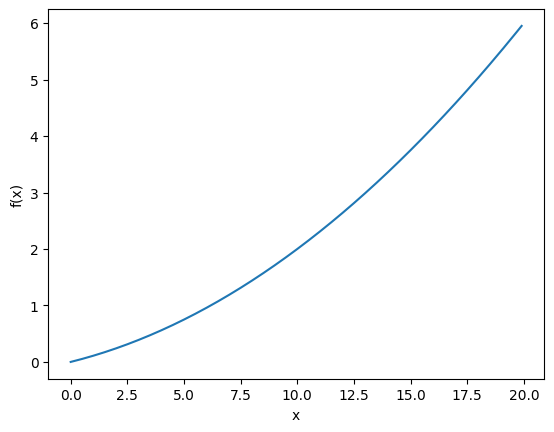

In [ ]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [ ]:
numerical_diff(function_1, 5)

0.1999999999990898

In [ ]:
numerical_diff(function_1, 10)

0.2999999999986347

## 偏微分


$$
f(x,y) = x^2 + y^2
$$

In [18]:
import numpy as np
def function_2(x,y):
    return x**2 + y**2

def function_3(x):
    return x[0]**2 + x[1]**2


In [19]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h)-f(x-h))/ (2*h)

$$
{x = 3},{y= 4}のとき,{\partial}f/{\partial}xを求める
$$

In [20]:
def function_tmp1(x):
    return x**2+4**2

dfdx = numerical_diff(function_tmp1, 3)
print(dfdx)

6.00000000000378


$$
{x = 3},{y= 4}のとき,{\partial}f/{\partial}yを求める
$$

In [21]:
def function_tmp2(y):
    return 3**2 + y**2

dfdy = numerical_diff(function_tmp2, 4)
print(dfdy)

7.999999999999119


## 空間微分

In [32]:
def numerical_grad(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # xと同じ形状の配列を生成
    for idx in range(x.size):
        tmp_val = x[idx]

        # f(x + h)の計算
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x - h)の計算
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 値を元に戻す
    return grad

In [33]:
dfdx_dfdy = numerical_grad(function_3, np.array([3.0,4.0]))

In [34]:
print(dfdx_dfdy)

[6. 8.]
